In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vl = 1
rhol = 13
pl = 10e5

vr = -1
rhor = 13
pr = 10e5

L = 10
tf = 0.02

gamma = 5/3

el = pl/((gamma-1)*rhol)
er = pr/((gamma-1)*rhor)

In [3]:
tt = np.linspace(0, tf, 2001)
tau = np.diff(tt)[0]

xx = np.linspace(-L, L, 201)
h = np.diff(xx)[0]

In [4]:
m = len(xx)//2
w = np.zeros([len(tt)+1, len(xx), 3])
w[0] = np.array([np.array([rhol, rhol*vl, rhol*el]) for x in xx[:m]] + [np.array([rhor, rhor*vr, rhor*er]) for x in xx[m:]])

In [5]:
f = lambda prev, curr, next, A, omega, lambdabs, omega_inv: curr - tau*(A @ (next-prev)/(2*h)) + tau*(omega_inv @ lambdabs @ omega) @ (next-2*curr+prev)/(2*h)

for n, t in enumerate(tt):
    for l, x in enumerate(xx):
        u = w[n][l][1]/w[n][l][0]
        e = w[n][l][2]/w[n][l][0]
        c = math.sqrt(gamma*(gamma-1)*e)

        omega = np.array([[-u*c, c, gamma-1], [-c**2, 0, gamma-1], [u*c, -c, gamma-1]])
        omega_inv = np.array([[1/(2*c**2), -2/(2*c**2), 1/(2*c**2)], [(u+c)/(2*c**2), -2*u/(2*c**2), (u-c)/(2*c**2)], [1/(2*(gamma-1)), 0, 1/(2*(gamma-1))]])
        lambdabs = np.diag([abs(u+c), abs(u), abs(u-c)])

        CFL = max(abs(u+c), abs(u), abs(u-c))*tau/h
        assert CFL <= 1
        A = np.array([[0, 1, 0], [-u**2, 2*u, gamma-1], [-gamma*u*e, gamma*e, u]])
        if l == len(xx)-1:
            w[n+1][l] = f(w[n][l-2], w[n][l-1], w[n][l], A, omega, lambdabs, omega_inv)
        elif l == 0:
            w[n+1][l] = f(w[n][l], w[n][l+1], w[n][l+2], A, omega, lambdabs, omega_inv)
        else:
            w[n+1][l] = f(w[n][l-1], w[n][l], w[n][l+1], A, omega, lambdabs, omega_inv)

In [6]:
def plotParams(time):
    fig, [[rhoax, uax], [eax, pax]] = plt.subplots(2, 2)

    n = int(len(tt)*time/tf)
    rho = w[n, :, 0]
    rhoax.plot(xx, rho)
    rhoax.set_xlabel(r'$x, м$')
    rhoax.set_ylabel(r'$\rho, кг/м^3$')
    rhoax.set_xlim(-10, 10)
    rhoax.grid()

    u = w[n, :, 1]/rho
    uax.plot(xx, u)
    uax.set_xlabel(r'$x, м$')
    uax.set_ylabel(r'$u, м/c$')
    uax.set_xlim(-10, 10)
    uax.grid()

    e = w[n, :, 2]/rho
    e /= 1e3
    eax.plot(xx, e)
    eax.set_xlabel(r'$x, м$')
    eax.set_ylabel(r'$e, кДж/кг$')
    eax.set_xlim(-10, 10)
    eax.grid()

    p = (gamma-1)*rho*e
    p /= 1e2
    pax.plot(xx, p)
    pax.set_xlabel(r'$x, м$')
    pax.set_ylabel(r'$p, атм$')
    pax.set_xlim(-10, 10)
    pax.grid()

    fig.suptitle(f't={time}с, h={round(h, 2)}м, 'r'$\tau$'f'={tau}с')
    fig.set_figheight(10)
    fig.set_figwidth(16)
    plt.subplots_adjust(wspace=0.2)

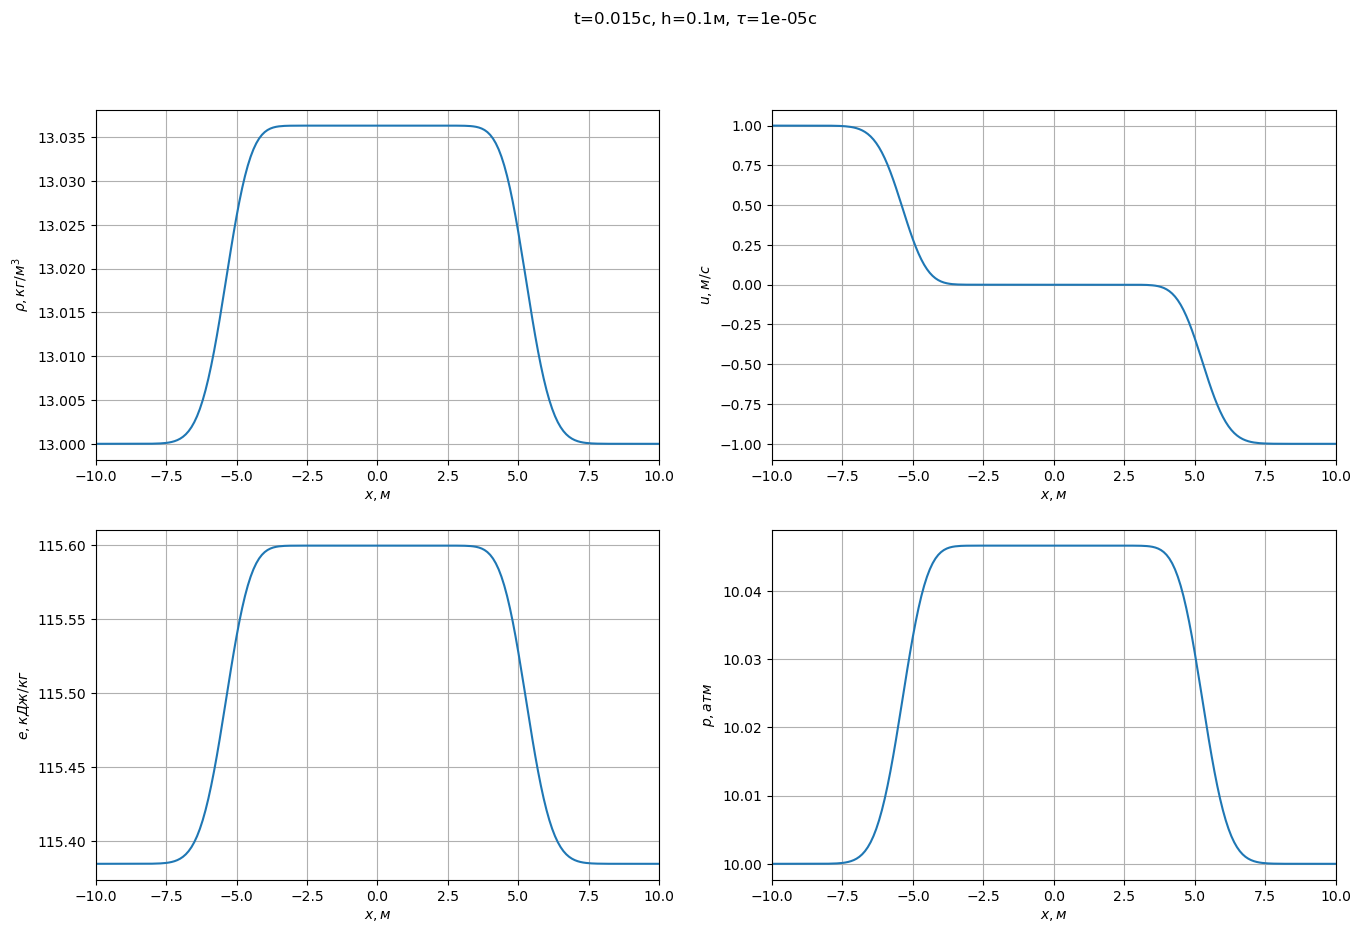

In [7]:
plotParams(0.015)